In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
#reading the data set named as train

data=pd.read_csv("healthcare-dataset-stroke-data.csv",header=0)

In [3]:
# Checking the shape of the data
data.shape

(5110, 12)

In [4]:
# Reading random Rows of the data

data.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3282,30870,Male,9.0,0,0,No,children,Urban,93.24,31.9,Unknown,0


In [5]:
 # checking the information of the dataset
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#for the description 
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
51,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [8]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
# Separating the output from the dataset

df = data.loc[:,data.columns!="stroke"]


In [10]:
# Creating output column

y = data["stroke"]


In [11]:
#total number of missing value in a table of each column

df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

In [12]:
# printing total number of duplicate values
df.duplicated().sum()

0

In [13]:
#finding the datatype of each feature

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [14]:
# Excluding/separating a categorical column from numerical columns

df1=df.select_dtypes(exclude=['object'])

In [15]:
# separating numerical columns from categorical

df2=df.select_dtypes(exclude=['float64','int64'])

In [16]:
df1.shape

(5110, 6)

In [17]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


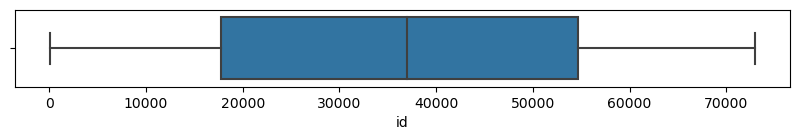

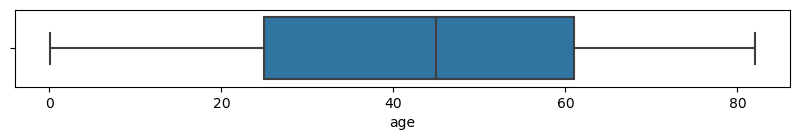

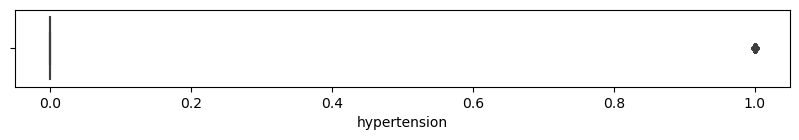

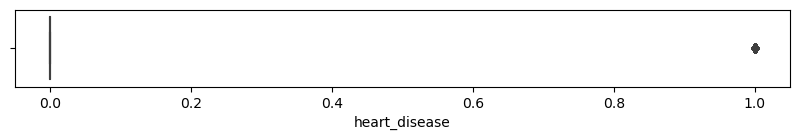

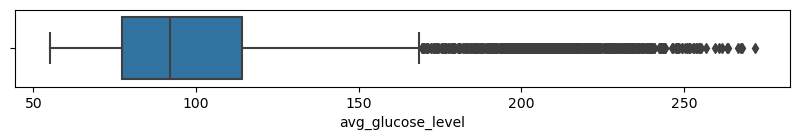

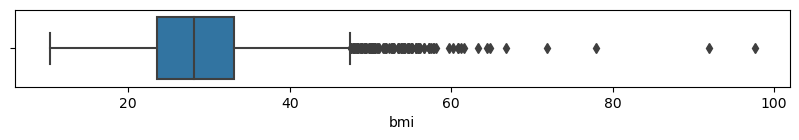

In [18]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

In [19]:
# outlier treatment

def cap_data(df1):
    for col in df1.columns:
        print("capping the",col)
        if (((df1[col].dtype)=='float64')|((df1[col].dtype)=='int64')):
            percentiles = df1[col].quantile([0.25,0.75]).values
            df1[col][df1[col] <= percentiles[0]] = percentiles[0]
            df1[col][df1[col] >= percentiles[1]] = percentiles[1]
        else:
            df1[col]=df1[col]
    return df1
final_df1 = cap_data(df1)


capping the id
capping the age
capping the hypertension
capping the heart_disease
capping the avg_glucose_level
capping the bmi


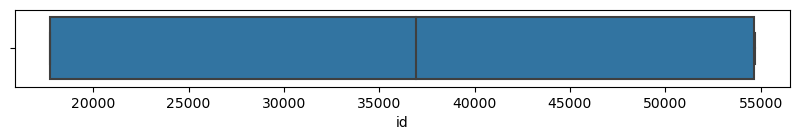

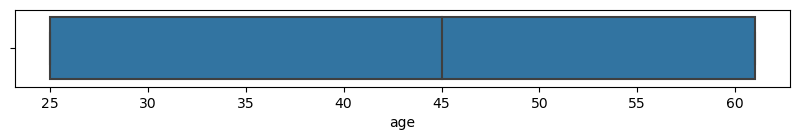

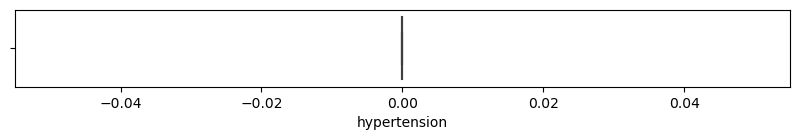

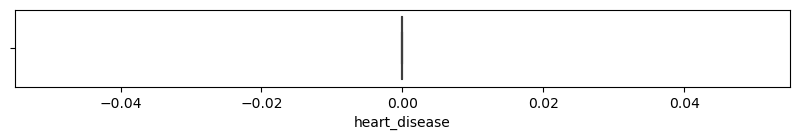

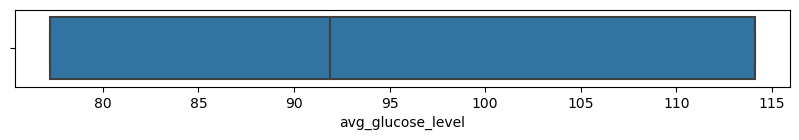

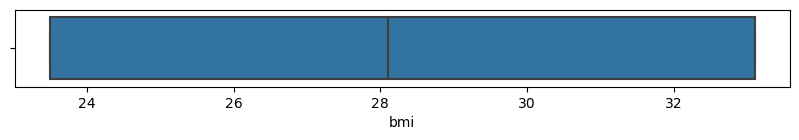

In [20]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

In [21]:
# missing value treatment using mean
mean_bmi = df1['bmi'].mean()
df1['bmi'] = df1['bmi'].fillna(mean_bmi)

In [22]:
df1['bmi'].isnull().sum()

0

In [25]:
# coverting the categorical features into numerical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame(df2)

# Initialize the OneHotEncoder object and specify columns to be encoded
ohe = OneHotEncoder(sparse=False, categories='auto')
columns_to_encode = ['gender', 'Residence_type', 'smoking_status','work_type','ever_married']

# Fit and transform the OneHotEncoder on the selected columns of the dataframe
encoded_cols = ohe.fit_transform(df[columns_to_encode])

# Create a dataframe from the encoded columns with the original column names
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names(columns_to_encode))

# Combine the original dataframe with the encoded dataframe
df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

print(df_encoded.head())


   gender_Female  gender_Male  gender_Other  Residence_type_Rural  \
0            0.0          1.0           0.0                   0.0   
1            1.0          0.0           0.0                   1.0   
2            0.0          1.0           0.0                   1.0   
3            1.0          0.0           0.0                   0.0   
4            1.0          0.0           0.0                   1.0   

   Residence_type_Urban  smoking_status_Unknown  \
0                   1.0                     0.0   
1                   0.0                     0.0   
2                   0.0                     0.0   
3                   1.0                     0.0   
4                   0.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             1.0                          0.0   
1                             0.0                          1.0   
2                             0.0                          1.0   
3             

In [26]:
df2 = df_encoded

In [27]:
# concatinating numerical and categorical columns 
data_frame=pd.concat([df1,df2],axis=1)

In [28]:
data_frame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,Residence_type_Rural,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes
0,17741.25,61.0,0,0,114.09,33.100000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,51676.00,61.0,0,0,114.09,28.216215,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,31112.00,61.0,0,0,105.92,32.500000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,54682.00,49.0,0,0,114.09,33.100000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,17741.25,61.0,0,0,114.09,24.000000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.00,61.0,0,0,83.75,28.216215,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5106,44873.00,61.0,0,0,114.09,33.100000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5107,19723.00,35.0,0,0,82.99,30.600000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5108,37544.00,51.0,0,0,114.09,25.600000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
data_frame.sample()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,Residence_type_Rural,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes
4367,52247.0,61.0,0,0,89.68,33.1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
data_frame.shape

(5110, 22)